# Loading Modules & Data

In [ ]:
import pandas as pd
import numpy as np
import googletrans
from googletrans import Translator
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
pd.options.display.max_rows = 216
pd.options.display.max_columns = 216

In [ ]:
df = pd.read_csv('Final Project PreSee Data.csv')
df.head()

,Start Time,Gender,Age,Height,Weight,BMI,Diagnosis,Total Score,ECG Total Text,ECG Text1,UUID,Farmingahm Value,Farmingahm Color,QRISK Value,QRISK Color,US Total Score,US Score1,US Color1,US Score2,US Color2,Blood Total Score,Blood Total Score Text,Blood Total Color,Blood Score1,Blood Color1,Blood Score2,Blood Color2,Smoking,Heart Disease,historyOfHeartDisease,BP Medication,Diabetes,Work Stress Level,Exercise Level (Hr/W),BP Systolic,BP Diastolic,HasdECGfile,HasdMEAfile,I. pa,I. pan,I. qa,I. ra,I. sa,I. stj,I. st20,I. st40,I. ta,I. qd,I. rd,I. sd,I. pd,I. pr,I. qs,I. qt,II. pa,II. pan,II. qa,II. ra,II. sa,II. stj,II. st20,II. st40,II. ta,II. qd,II. rd,II. sd,II. pd,II. pr,II. qs,II. qt,III. pa,III. pan,III. qa,III. ra,III. sa,III. stj,III. st20,III. st40,III. ta,III. qd,III. rd,III. sd,III. pd,III. pr,III. qs,III. qt,aVL. pa,aVL. pan,aVL. qa,aVL. ra,aVL. sa,aVL. stj,aVL. st20,aVL. st40,aVL. ta,aVL. qd,aVL. rd,aVL. sd,aVL. pd,aVL. pr,aVL. qs,aVL. qt,aVF. pa,aVF. pan,aVF. qa,aVF. ra,aVF. sa,aVF. stj,aVF. st20,aVF. st40,aVF. ta,aVF. qd,aVF. rd,aVF. sd,aVF. pd,aVF. pr,aVF. qs,aVF. qt,V1. pa,V1. pan,V1. qa,V1. ra,V1. sa,V1. stj,V1. st20,V1. st40,V1. ta,V1. qd,V1. rd,V1. sd,V1. pd,V1. pr,V1. qs,V1. qt,V2. pa,V2. pan,V2. qa,V2. ra,V2. sa,V2. stj,V2. st20,V2. st40,V2. ta,V2. qd,V2. rd,V2. sd,V2. pd,V2. pr,V2. qs,V2. qt,V3. pa,V3. pan,V3. qa,V3. ra,V3. sa,V3. stj,V3. st20,V3. st40,V3. ta,V3. qd,V3. rd,V3. sd,V3. pd,V3. pr,V3. qs,V3. qt,V4. pa,V4. pan,V4. qa,V4. ra,V4. sa,V4. stj,V4. st20,V4. st40,V4. ta,V4. qd,V4. rd,V4. sd,V4. pd,V4. pr,V4. qs,V4. qt,V5. pa,V5. pan,V5. qa,V5. ra,V5. sa,V5. stj,V5. st20,V5. st40,V5. ta,V5. qd,V5. rd,V5. sd,V5. pd,V5. pr,V5. qs,V5. qt,V6. pa,V6. pan,V6. qa,V6. ra,V6. sa,V6. stj,V6. st20,V6. st40,V6. ta,V6. qd,V6. rd,V6. sd,V6. pd,V6. pr,V6. qs,V6. qt
0,3/3/2021 11:50,Male,52.0,171.0,82.0,28.0,"Light sclerosis in neck arteries, increased fa...",48,abnormalities found,"ABN,Sinus,STEMI,LVA,OA,O",e99c6ee8-542a-4117-9995-32836b7106b5,20.0,RED,2.0,GREEN,56,15.0,YELLOW,15.0,YELLOW,39,"Total Cholesterol,HDL,Triglycerides,LDL,Non-HD...",RED,92.0,GREEN,34.0,RED,NO,NO,NO,NO,NO,5-Jan,5-Apr,137.0,90.0,False,False,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,3/11/2021 18:05,Male,46.0,177.0,85.0,27.0,"Findings: Decreased in -neck arteries, increas...",54,abnormalities found,"ABN,Sinus,IB,Ab QRST ang MEA = p dur",4798b158-8b31-4aa5-9ceb-54445135a227,4.0,GREEN,2.0,GREEN,46,0.0,GREEN,15.0,RED,73,"Non-HDL,TC/HDL,Ldl/Hdl out of range",YELLOW,81.0,GREEN,72.0,YELLOW,NO,NO,NO,NO,NO,5-Mar,5-Feb,119.0,78.0,True,True,43,0,-97,1352,-149,-145,-157,-169,-515,40,104,0,100,182,128,466,62,0,-35,1809,-132,-132,-120,-105,-201,28,112,0,100,182,128,466,34,0,-11,453,4,7,34,46,320,20,124,0,100,182,128,466,56,0,-87,428,-81,-81,-106,-97,-388,44,96,0,100,182,128,466,118,0,-20,1127,-73,-62,-51,-20,76,24,120,0,100,182,128,466,0,-57,0,-701,156,142,145,139,221,0,144,0,100,182,128,466,38,0,0,-281,7,7,13,13,-195,0,144,0,100,182,128,466,31,0,0,1413,-210,-210,-192,-187,-763,0,128,0,100,182,128,466,62,0,-1,2016,-338,-330,-320,-319,-1048,8,128,0,100,182,128,466,42,0,0,2092,-335,-335,-336,-347,-1096,4,128,0,100,182,128,466,49,0,-24,2027,-336,-317,-309,-339,-901,24,120,0,100,182,128,466
2,3/11/2021 14:25,Female,61.0,155.0,89.0,37.0,"Findings: Decreased sclerosis, increased fat p...",56,abnormalities found,"ABN,Sinus,LAD,IRB,IB, MEA = p dur",a1fa3510-f89d-44d5-ab54-4693853d5585,4.0,GREEN,3.0,GREEN,56,0.0,GREEN,15.0,YELLOW,72,"Total Cholesterol,Triglycerides,Non-HDL,TC/HDL...",YELLOW

# Data Preparing

In [ ]:
# HasdECGfile – True / False – marks whether the patient has ECG raw data.  Only the patients with True should be analyzed with datasets 2 and 3 below.
df = df[df["HasdECGfile"] == True]

In [ ]:
df.drop("Diagnosis", axis=1, inplace=True)

In [ ]:
df["condition"] = df["Total Score"].apply(lambda x: "High" if x<70 else ("Medium" if x>=70 and x<85 else "Normal"))

In [ ]:
df.drop("US Total Score", axis=1, inplace=True)

In [ ]:
mapper = {"5-Jan": 1, "5-Feb": 2, "5-Mar": 3, "5-Apr": 4, "5-May": 5, "0/5": 5, 'null/5': 5}

cols = ["Work Stress Level", "Exercise Level (Hr/W)"]
df[cols[0]] = df[cols[0]].apply(lambda x: mapper[x])
df[cols[1]] = df[cols[1]].apply(lambda x: mapper[x])

In [ ]:
cols = ["Blood Total Score Text", "ECG Text1", "HasdECGfile", "Start Time", "UUID"]
df.drop(cols, axis=1, inplace=True)

In [ ]:
encoder = LabelEncoder()

for col in df.select_dtypes("O").columns[:-1]:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.drop("condition", axis=1)
y = df.condition

In [ ]:
# Balancing data
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Part 2: Supervised Learning

In [ ]:
def evaluate(y_test, y_pred):
    print(f"Accuracy of Model : {accuracy_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True)
    plt.xlabel("Actual Output")
    plt.ylabel("Predicted Output")
    plt.title("Confusion Matrix", fontsize=18)
    plt.show()

### Model 1

Here we selected some demographic features with some initial medical details to see if the model can make true prediction using these base features.

Accuracy of Model : 0.7961165048543689


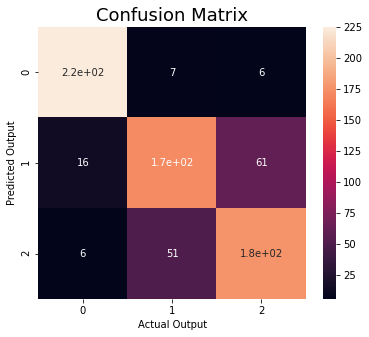

In [ ]:
base_features = ["Gender", "Age", "Height", "Weight", "BMI", "Smoking", "BP Medication", "Diabetes", "Work Stress Level", "Exercise Level (Hr/W)"]

model = DecisionTreeClassifier(criterion="gini", max_depth=None)

model.fit(X_train[base_features].values, y_train)
y_pred = model.predict(X_test[base_features].values)
evaluate(y_test, y_pred)

### Model 3

Here we used only the ECG features to see if only ECG can tell us the condition of the heart. If it can then why patients needs to go for other tests.

Accuracy of Model : 0.869625520110957


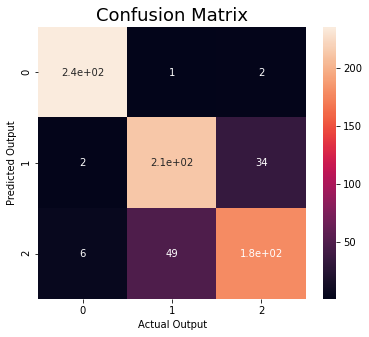

In [ ]:
ecg_features = X.iloc[:, 31:].columns

model = DecisionTreeClassifier(criterion="gini")

model.fit(X_train[ecg_features].values, y_train)
y_pred = model.predict(X_test[ecg_features].values)
evaluate(y_test, y_pred)

# Model 3

Using all features to see if the model can perform well with all details and all medical tests.

Accuracy of Model : 1.0


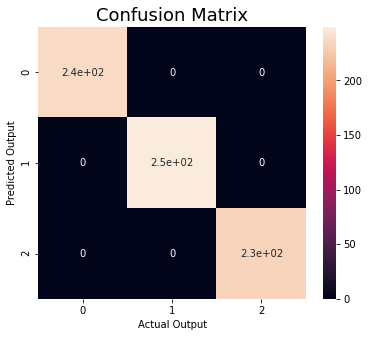

In [ ]:
model = DecisionTreeClassifier(criterion="gini")

model.fit(X_train.values, y_train)
y_pred = model.predict(X_test.values)
evaluate(y_test, y_pred)

# Part 3: Unsupervised Learning

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

X = pd.DataFrame(data=X, columns=df.drop("condition", axis=1).columns)

### Model 1 

K-Means models with base features.

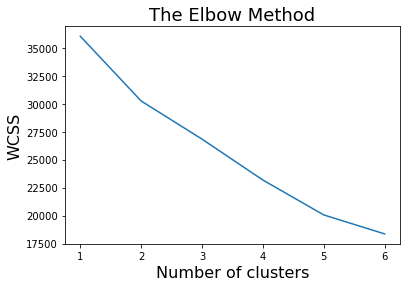

In [ ]:
from sklearn.cluster import KMeans

# Let's find best number of clusters using Elbow method
wcss=[]
number_clusters = range(1,7)
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X[base_features])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

plt.plot(number_clusters,wcss)
plt.title('The Elbow Method', fontsize=18)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.show()

# In this graph we can see that the elbow is mad at x value 2. That's mean the best number of clusters are 2 for our dataset.
# Let's Build Final Model
model = KMeans(n_clusters = 2, init = "k-means++", random_state = 42)
y_kmeans = model.fit_predict(X[base_features])

### Model 2

With ECG feature let's make clusters

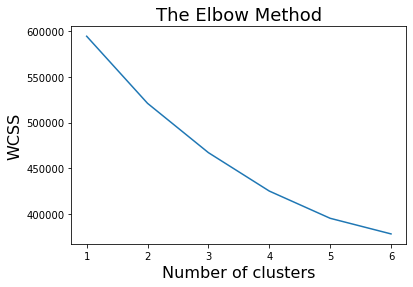

In [ ]:
from sklearn.cluster import KMeans

# Let's find best number of clusters using Elbow method
wcss=[]
number_clusters = range(1,7)
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X[ecg_features])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

plt.plot(number_clusters,wcss)
plt.title('The Elbow Method', fontsize=18)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.show()

# In this graph we can see that the elbow is mad at x value 2. That's mean the best number of clusters are 2 for our dataset.
# Let's Build Final Model
model = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = model.fit_predict(X[ecg_features])

### Model 3

With all possible features.

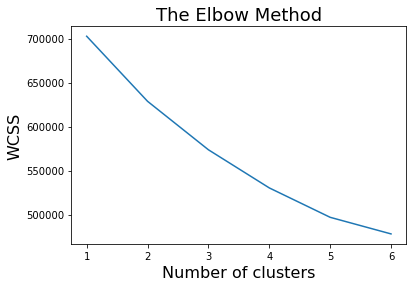

In [ ]:
from sklearn.cluster import KMeans

# Let's find best number of clusters using Elbow method
wcss=[]
number_clusters = range(1,7)
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

plt.plot(number_clusters,wcss)
plt.title('The Elbow Method', fontsize=18)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('WCSS', fontsize=16)
plt.show()

# In this graph we can see that the elbow is mad at x value 2. That's mean the best number of clusters are 2 for our dataset.
# Let's Build Final Model
model = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = model.fit_predict(X)

# Part 4: Conclusion

The main important point from all of this analysis are...
- We divided the data into three feature set.
        - Base Features
        - ECG Features
        - All Features
        
- Base features like age gender height weight gave us a base model that can have around 70% accuracy to predict the condition of heart.

- ECG features have great impact in determining the condition of the heart. The model with only ECG feature gives an accuracy of around 85%. That's mean only ECG test can help the doctors to determine the heart condition.

- Model with all of the features that includes ECG, blood test, basic details, and also demo graphic details give an accuracy of around 99 to 100% that's mean a patient with all of such kind of test is able to find his her heart condition 100 percent accuractely and such model can be deployed in the real world.

- Clustering did not give us much details but we made three different models for Clustering and for all the models three different set of feature has been used as we were using in supervised learning part. And to determine the number of the clusters we used elbow method and for each model. You can see a graph of elbow method to find the optimal number of clusters.